In [ ]:
!pip install openpyxl

In [51]:
import pandas as pd
import time

start = time.time()

# Kaggle에서 다운로드 가능한 Air BnB 뉴욕지역 숙박 정보
df = pd.read_excel('Data/nyc_2019.xlsx', index_col=0, engine='openpyxl') 
df.head()

end = time.time()

print('Elapsed time: %.2f' % (end - start)) #소수점 둘째 자리까지 나타내도록 함

Elapsed time: 9.03


In [52]:
selected = ['neighbourhood_group', 'room_type', 'number_of_reviews', 'calculated_host_listings_count', 'price']
df_rent = df[selected] # 일부 컬럼만 선택하기
df_rent.columns = ['group', 'type', 'review', 'listing', 'price'] # 컬럼명 변경(이름이 너무 길어서)
df_rent.type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: type, dtype: int64

In [53]:
pd.get_dummies(df_rent.type).head()

,Entire home/apt,Private room,Shared room
id,,,
2539,0,1,0
2595,1,0,0
3647,0,1,0
3831,1,0,0
5022,1,0,0


In [54]:
pd.get_dummies(df_rent[['group', 'type']]).head()

,group_Bronx,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island,type_Entire home/apt,type_Private room,type_Shared room
id,,,,,,,,
2539,0,1,0,0,0,0,1,0
2595,0,0,1,0,0,1,0,0
3647,0,0,1,0,0,0,1,0
3831,0,1,0,0,0,1,0,0
5022,0,0,1,0,0,1,0,0


## Imputation 연습하기

In [55]:
## 결측치를 채우는 방법을 Imputation이라고 합니다.

In [1]:
import pandas as pd

df = pd.read_excel('Data/med_data_actual.xlsx', index_col=0, engine='openpyxl')
df = df.replace({'의예과':'Med', '치의예과':'Dent', '남':1, '여':2}) #데이터프레임 안에서의 값을 변경하는 함수
df = df.rename(columns={'학과':'Dept', '성별':'Sex'})
columns = df.columns

In [2]:
df.dtypes

Dept         object
Sex         float64
A1            int64
A2            int64
A3          float64
A4          float64
A5          float64
B1          float64
B2            int64
B3          float64
B4            int64
B5            int64
B6            int64
B7            int64
C1            int64
C2            int64
C3            int64
C4            int64
C5            int64
C6            int64
C7            int64
Interest      int64
Motive      float64
dtype: object

In [3]:
from sklearn.impute import SimpleImputer

x = df.iloc[:,2:] #Impute할 데이터 선택
imp = SimpleImputer(strategy='mean') #평균값으로 대체
x_prime = imp.fit_transform(x) # Imputation
x_prime = pd.DataFrame(x_prime, columns=columns[2:]) #데이터프레임으로 변환

In [4]:
x.head()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,B7,C1,C2,C3,C4,C5,C6,C7,Interest,Motive
Index,,,,,,,,,,,,,,,,,,,,,
0,2,2,1.0,2.0,2.0,NaN,3,3.0,1,1,...,2,2,4,1,3,2,2,1,2,1.0
1,2,2,5.0,2.0,2.0,2.0,4,2.0,2,2,...,2,2,2,1,5,5,1,1,1,1.0
2,2,3,5.0,4.0,3.0,2.0,3,4.0,3,3,...,2,3,3,3,3,3,3,3,3,2.0
3,1,2,2.0,1.0,2.0,1.0,2,1.0,2,1,...,2,1,1,1,1,2,1,2,1,2.0
4,2,2,4.0,3.0,2.0,2.0,3,2.0,2,3,...,3,2,2,2,3,3,2,2,3,2.0


In [5]:
x_prime.head()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,B7,C1,C2,C3,C4,C5,C6,C7,Interest,Motive
0,2.0,2.0,1.0,2.0,2.0,2.333333,3.0,3.0,1.0,1.0,...,2.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,1.0
1,2.0,2.0,5.0,2.0,2.0,2.000000,4.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0
2,2.0,3.0,5.0,4.0,3.0,2.000000,3.0,4.0,3.0,3.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
3,1.0,2.0,2.0,1.0,2.0,1.000000,2.0,1.0,2.0,1.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0
4,2.0,2.0,4.0,3.0,2.0,2.000000,3.0,2.0,2.0,3.0,...,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0


In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp2 = IterativeImputer(max_iter=10, random_state=0)
x_rep = imp2.fit_transform(x)
x_rep = pd.DataFrame(x_rep, columns=columns[2:])
x_rep.head()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,B7,C1,C2,C3,C4,C5,C6,C7,Interest,Motive
0,2.0,2.0,1.0,2.0,2.0,2.855048,3.0,3.0,1.0,1.0,...,2.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,1.0
1,2.0,2.0,5.0,2.0,2.0,2.000000,4.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0
2,2.0,3.0,5.0,4.0,3.0,2.000000,3.0,4.0,3.0,3.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
3,1.0,2.0,2.0,1.0,2.0,1.000000,2.0,1.0,2.0,1.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0
4,2.0,2.0,4.0,3.0,2.0,2.000000,3.0,2.0,2.0,3.0,...,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0


## MICE 활용

In [8]:
!pip install miceforest

     |████████████████████████████████| 69 kB 5.0 MB/s eta 0:00:011
     |████████████████████████████████| 1.2 MB 8.2 MB/s eta 0:00:01


#### Random Forest를 이용한 결측치 보완법이다
#### !pip install miceforest 명령어를 통해서 설치할 수 있다.

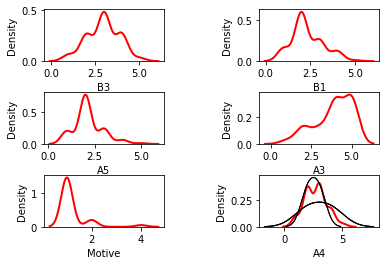

In [11]:
#MICE 수행은 대체로 오래 걸리는 작업이다.

import miceforest as mf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# MICE 수행 커널 만들기
kernel = mf.MultipleImputedKernel(data=x, datasets=5, 
                                  save_all_iterations=True, random_state=21)

kernel.mice(5, verbose=False) #5회 반복, 반복 수행하고 싶은 숫자를 입력한다.
kernel.plot_imputed_distributions(wspace=0.8, hspace=0.6)

In [63]:
dataset = []
for i in range(5):
    dataset.append(kernel.complete_data(i))

## PCA

In [ ]:
#PCA: 주요인 분석, N차원 -> 2, 3차원으로 나타내는 방법 (분산을 가장 잘 설명하는 것을 기준으로 함)

In [64]:
import pandas as pd

df = pd.read_excel('Data/univ_data.xlsx', index_col=0, engine='openpyxl')

In [65]:
x = df.iloc[:,:-2]
y = [1 if i==1 else 2 for i in df['CollegeMJ_1.0']] #이공계인지, 비이공계인지 확인

In [66]:
print(df.shape)
pd.Series(y).value_counts()

(6908, 113)


1    4079
2    2829
dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
pca_data = pca.fit_transform(x)
principalDf = pd.DataFrame(data=pca_data, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.70938518 0.14386954]
0.8532547168686703


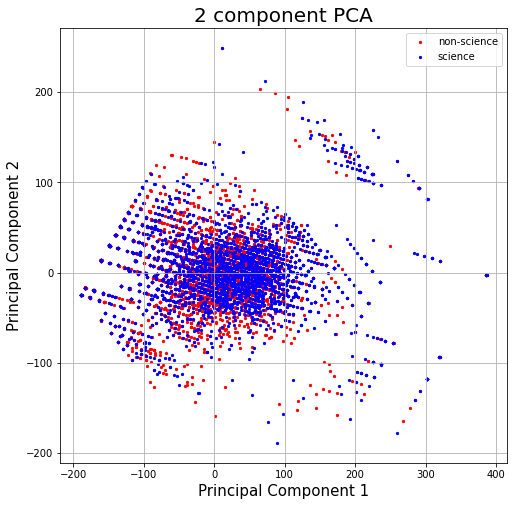

In [68]:
import matplotlib.pyplot as plt

finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis = 1)
finalDf.columns = ['PC 1', 'PC 2', 'Major']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = [1, 2]
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = (finalDf['Major'] == target)
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 5)
ax.legend(['non-science', 'science'])
ax.grid()

## t-SNE

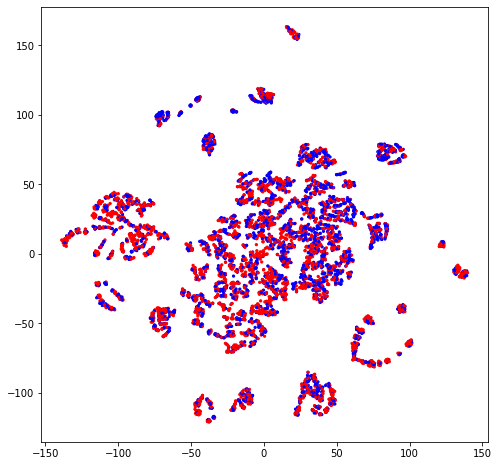

In [69]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(n_components=2, learning_rate=100, n_iter=10000)
transformed = model.fit_transform(x)

xs = transformed[:,0]
ys = transformed[:,1]
colors = ['r' if i==1 else 'b' for i in df['CollegeMJ_1.0']]
plt.figure(figsize=(8, 8))
plt.scatter(xs, ys, c=colors, s=5)
plt.show()

## UMAP

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

svc = LinearSVC(dual=False, random_state=123)
params_grid = {"C": [10**k for k in range(-3, 4)]}

clf = GridSearchCV(svc, params_grid)
cclf = CalibratedClassifierCV(base_estimator=clf , cv=5)
cclf.fit(x_train, y_train)
prob = cclf.predict_proba(x_test)[:,1]
print('%.3f' % cclf.score(x_test, y_test))

0.725


In [29]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 5.6 MB/s  eta 0:00:01
  Using cached numba-0.53.1-cp36-cp36m-manylinux2014_x86_64.whl (3.4 MB)
     |████████████████████████████████| 1.1 MB 98.1 MB/s eta 0:00:01
  Using cached llvmlite-0.36.0-cp36-cp36m-manylinux2010_x86_64.whl (25.3 MB)
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82696 sha256=78913344bf470a4cf8ee271f237bf1c6e0471bf5010542778e2ac28570e6a9fb
  Stored in directory: /home/user/.cache/pip/wheels/21/13/d2/20d08b12788c5c75e5e02cba181b9c8f1e4cdc8616aabf9209
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52587 sha256=d9ec49b207914dfaa169e430cb645b58dc4d167b11a3059c055c9af3e3555bce
  Stored in directory: /home/user/.cache/pip/wheels/fe/45/72/7cbd753e84b77b0691edbd0cbffcfde95217953db0aed12547
Successfully built umap-learn pynndescent


Text(0.5, 1.0, 'UMAP projection of the dataset')

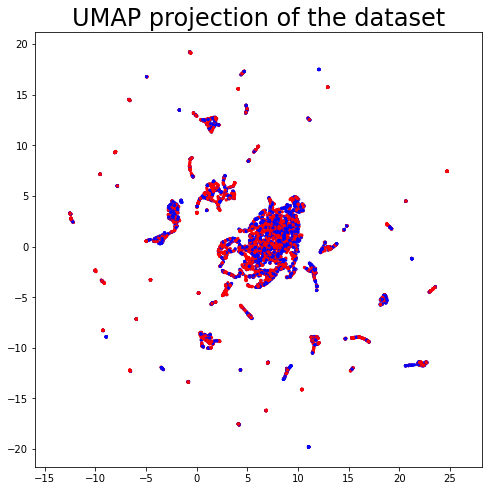

In [71]:
import umap.umap_ as umap

umap = umap.UMAP()

embedding = umap.fit_transform(x)

plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

### 혼동 행렬을 포함한 여러 가지 개념의 이해

![conf](img/conf_max.pbm)

In [ ]:
진단검사에서 양성, 음성으로 판단하게 되는데, 이 때, 실제 양성 -> 양성 (True Positive), 실제 양성 -> 음성 (False Negative), ...

정밀도(Precision): 모델이 True로 분류한 것 중에 실제로 True인 비율
재현율(Recall): 실제로 True인 것 중에서 모델이 True로 예측한 비율
정확도(Accuracy): True를 True로, False를 False로 맞게 예측한 비율
F1 Score: 정밀도와 재현율의 조화 평균

![re](img/recall.png)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [73]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
knn_matrix = metrics.confusion_matrix(y_test, y_pred)
print(knn_matrix)
knn_report = metrics.classification_report(y_test, y_pred)
print(knn_report)

0.5634346357935359
[[824 418]
 [487 344]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.65      1242
           2       0.45      0.41      0.43       831

    accuracy                           0.56      2073
   macro avg       0.54      0.54      0.54      2073
weighted avg       0.56      0.56      0.56      2073



## SVM

![svm](img/svm.png)

In [74]:
from sklearn import svm

svm_model = svm.SVC(kernel='poly') #Polynomial: 다항식으로 리턴
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
svm_report = metrics.classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

           1       0.62      0.95      0.75      1242
           2       0.60      0.12      0.20       831

    accuracy                           0.62      2073
   macro avg       0.61      0.53      0.48      2073
weighted avg       0.61      0.62      0.53      2073



## Decision Tree

![dt](img/dt.png)

In [75]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
tree_report = metrics.classification_report(y_test, y_pred)
print(tree_report)

              precision    recall  f1-score   support

           1       0.71      0.81      0.75      1242
           2       0.63      0.50      0.56       831

    accuracy                           0.68      2073
   macro avg       0.67      0.65      0.66      2073
weighted avg       0.68      0.68      0.68      2073



## Random Forest

![rf](img/rf.png)

In [76]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, 
                             max_depth=20, random_state=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
rf_report = metrics.classification_report(y_test, y_pred)
print(rf_report)

              precision    recall  f1-score   support

           1       0.73      0.83      0.78      1242
           2       0.68      0.55      0.61       831

    accuracy                           0.72      2073
   macro avg       0.71      0.69      0.69      2073
weighted avg       0.71      0.72      0.71      2073



## Ada Boost

![ada](img/ada_boost.jpeg)

In [77]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
ada_report = metrics.classification_report(y_test, y_pred)
print(ada_report)

              precision    recall  f1-score   support

           1       0.73      0.84      0.78      1242
           2       0.69      0.52      0.59       831

    accuracy                           0.71      2073
   macro avg       0.71      0.68      0.69      2073
weighted avg       0.71      0.71      0.71      2073



In [78]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
gb_report = metrics.classification_report(y_test, y_pred)
print(gb_report)

              precision    recall  f1-score   support

           1       0.73      0.83      0.78      1242
           2       0.68      0.55      0.61       831

    accuracy                           0.72      2073
   macro avg       0.71      0.69      0.69      2073
weighted avg       0.71      0.72      0.71      2073



## k-Means  Clustering

![kms](img/kms.png)

In [79]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(x)
tr = kmeans.fit_transform(x)
y_pred = kmeans.labels_

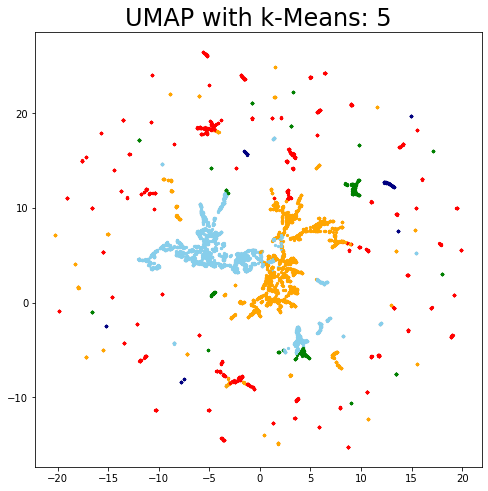

In [80]:
import umap.umap_ as umap
import time

start = time.time()

umap = umap.UMAP()
embedding = umap.fit_transform(tr)

colors = ['orange', 'skyblue', 'red', 'green', 'navy']
plt.figure(figsize=(8, 8))

for i, p in enumerate(embedding):
    plt.scatter(p[0], p[1], c=colors[y_pred[i]], s=5)

plt.title('UMAP with k-Means: 5', fontsize=24)
plt.show()

end = time.time()
print(end-start)

In [81]:
Sum_of_squared_distances = []

K = range(1, 20)

for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

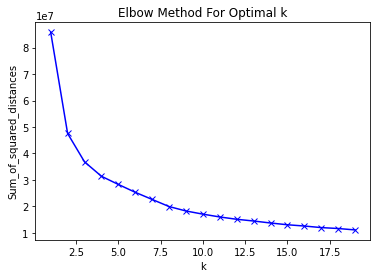

In [82]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

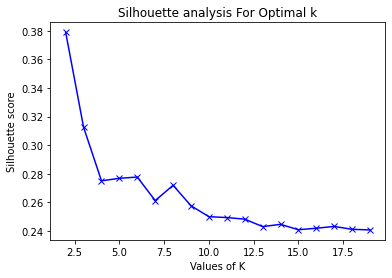

In [83]:
#실루엣 점수는 군집이 서로 얼마나 밀집해 있는가이며, 최대 값은 1로 나타난다.

from sklearn.metrics import silhouette_score

silhouette_avg = []
K2 = range(2, 20)

for k in K2: 
    km = cluster.KMeans(n_clusters=k)
    km.fit(x)
    cluster_labels = km.labels_ 
    silhouette_avg.append(silhouette_score(
        x, cluster_labels)) # 실루엣 점수
    
plt.plot(K2, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

## DBSCAN

![dbs](img/dbscan.png)

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('Data/nyc_2019.xlsx', index_col=0, engine='openpyxl')
selected = ['neighbourhood_group', 'room_type', 'number_of_reviews', 'calculated_host_listings_count', 'price']
df_rent = df[selected]
df_rent.columns = ['group', 'type', 'review', 'listing', 'price']

In [85]:
scaler = StandardScaler()

data = scaler.fit_transform(df_rent.iloc[:, 2:])

In [86]:
import numpy as np

temp = pd.get_dummies(df_rent[['group', 'type']])
temp_cols = list(temp.columns)
temp_cols.extend(['review', 'listing', 'price'])
x_num = np.concatenate((temp.to_numpy(), data), axis=1)
x_db = pd.DataFrame(x_num, columns=temp_cols)

In [87]:
dbs = DBSCAN(eps=0.5, min_samples=10).fit(x_db)
y_pred = dbs.labels_
y_pred

array([0, 1, 2, ..., 1, 7, 2])

In [88]:
x_db['cluster'] = y_pred
x_db.cluster.value_counts()

 1     12030
 0     10067
 3      9443
 2      7912
 4      3253
 6      2079
 8       636
 7       446
-1       415
 13      386
 18      369
 9       362
 25      310
 22      230
 12      190
 10      177
 11      165
 19      116
 23       79
 17       58
 14       52
 16       24
 20       23
 24       21
 15       19
 21       17
 5        16
Name: cluster, dtype: int64